# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval?select=loan_sanction_train.csv

Dataset ini berasal dari perusahaan keuangan Dream Housing Finance yang ingin mengotomatiskan proses kelayakan pinjaman perumahan secara real-time berdasarkan detail pelanggan yang diberikan saat mengisi formulir aplikasi online.

Otomatisasi ini bertujuan untuk mengidentifikasi segmen pelanggan yang memenuhi syarat untuk jumlah pinjaman tertentu sehingga perusahaan dapat menargetkan pelanggan tersebut secara langsung.

## 📊 Deskripsi Kolom Dataset Loan Prediction

| Nama Kolom            | Penjelasan                                                                 | Tipe Data            |
|----------------------|-----------------------------------------------------------------------------|----------------------|
| **Loan_ID**           | ID unik untuk setiap aplikasi pinjaman                                      | Object / String      |
| **Gender**            | Jenis kelamin pemohon (Male / Female)                                       | Kategorikal          |
| **Married**           | Status pernikahan pemohon (Yes / No)                                        | Kategorikal          |
| **Dependents**        | Jumlah tanggungan (0, 1, 2, 3+)                                              | Kategorikal          |
| **Education**         | Tingkat pendidikan pemohon (Graduate / Under Graduate)                     | Kategorikal          |
| **Self_Employed**     | Status pekerjaan pemohon (Yes: bekerja sendiri / No)                       | Kategorikal          |
| **ApplicantIncome**   | Pendapatan pemohon utama                                                    | Numerik              |
| **CoapplicantIncome** | Pendapatan tambahan dari pasangan atau rekan pemohon                        | Numerik              |
| **LoanAmount**        | Jumlah pinjaman yang diajukan (dalam ribuan)                                | Numerik              |
| **Loan_Amount_Term**  | Jangka waktu pinjaman (dalam bulan)                                         | Numerik              |
| **Credit_History**    | Riwayat kredit (1.0: memenuhi syarat, 0.0: tidak memenuhi syarat)           | Kategorikal / Numerik|
| **Property_Area**     | Lokasi properti (Urban / Semi Urban / Rural)                                | Kategorikal          |
| **Loan_Status**       | **Target** – Status kelulusan pinjaman (Y: disetujui, N: ditolak)           | Kategorikal          |


# **2. Import Library**

In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

In [4]:
df = pd.read_csv('loan_sanction_train.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
print("Dimensi data:")
print(df.shape)

print("\nTipe data setiap kolom:")
print(df.dtypes)

Dimensi data:
(614, 13)

Tipe data setiap kolom:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [7]:
df = df.drop('Loan_ID', axis=1)

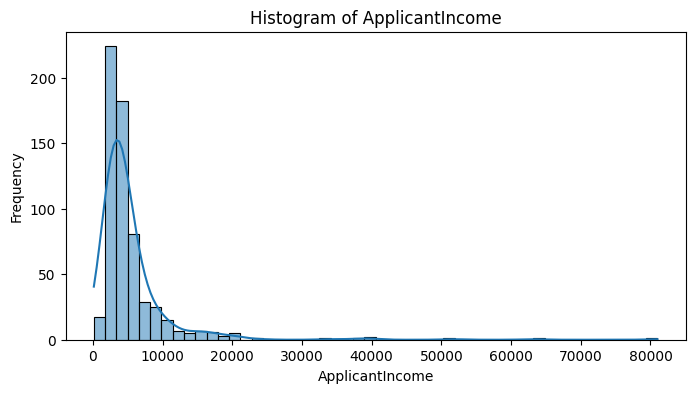

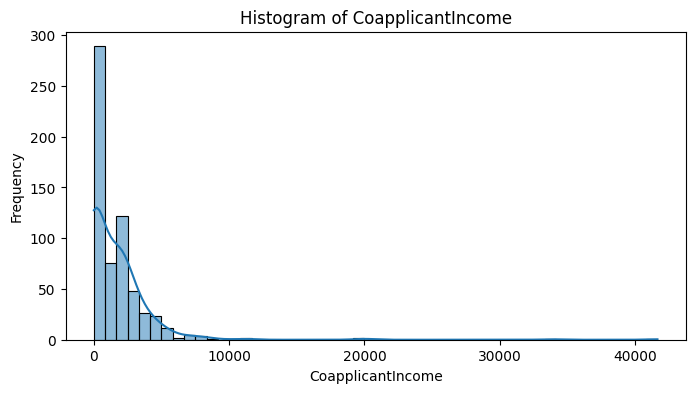

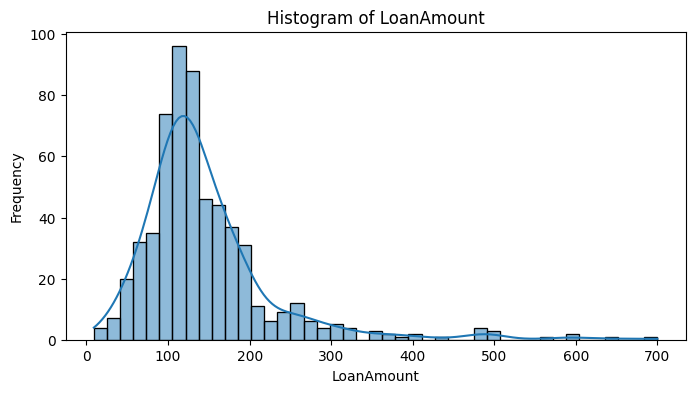

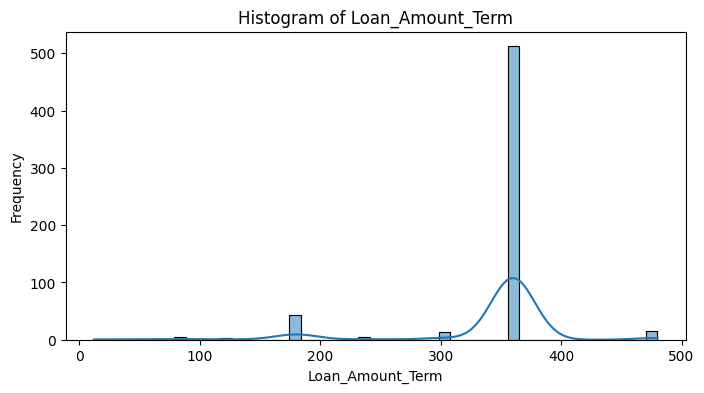

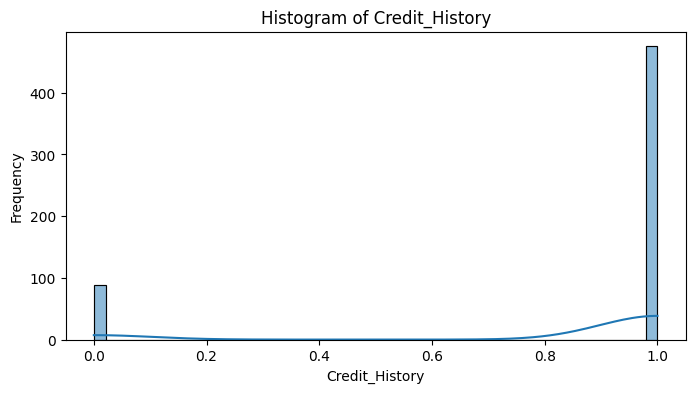

In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Plot histogram for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

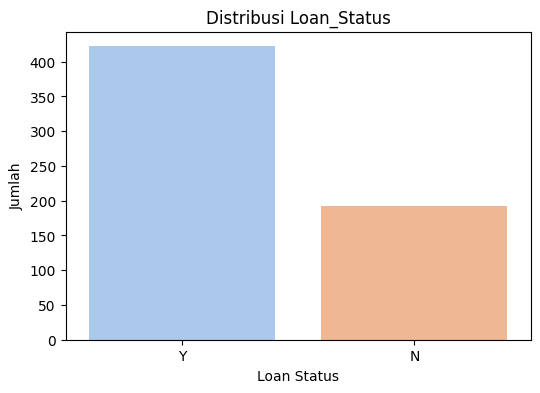

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df, palette='pastel')
plt.title('Distribusi Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Jumlah')
plt.show()

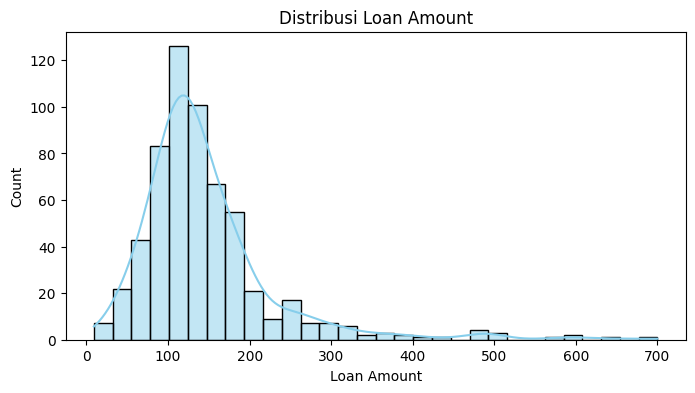

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(df['LoanAmount'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribusi Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

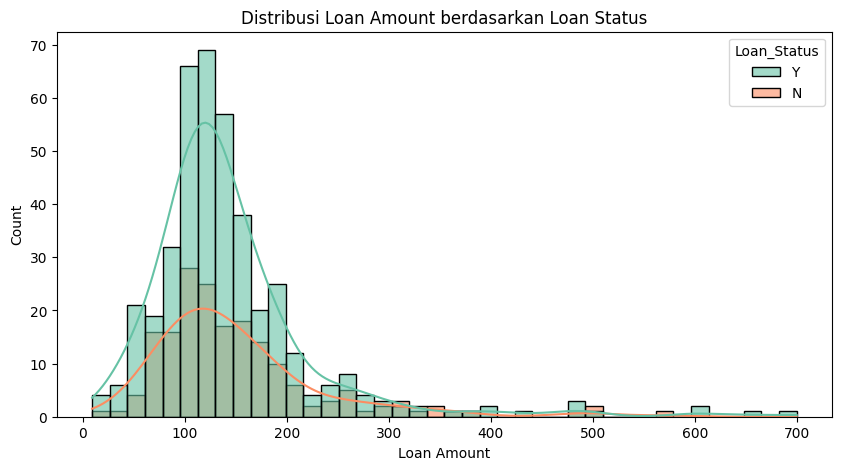

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='LoanAmount', hue='Loan_Status', kde=True, bins=40, palette='Set2', alpha=0.6)
plt.title('Distribusi Loan Amount berdasarkan Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

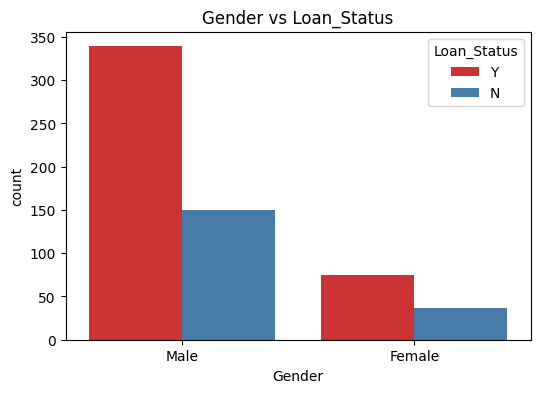

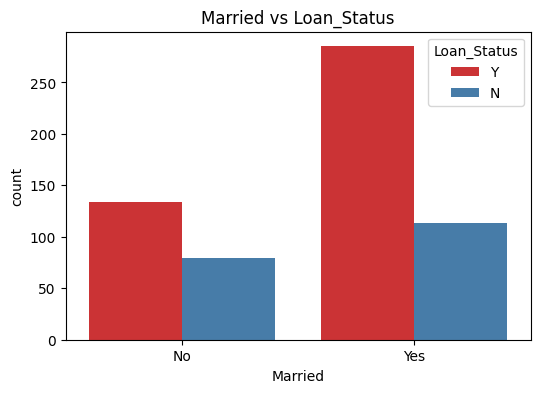

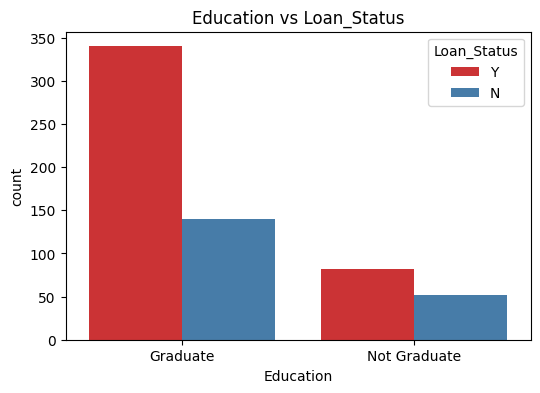

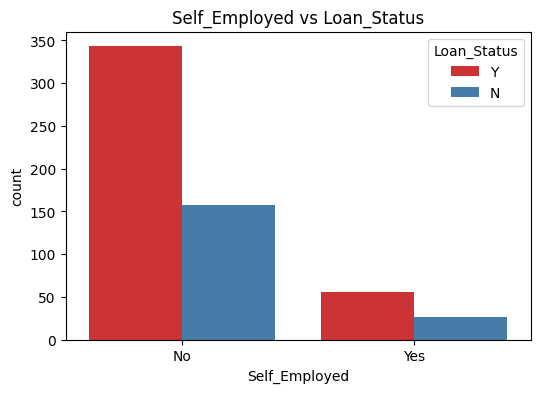

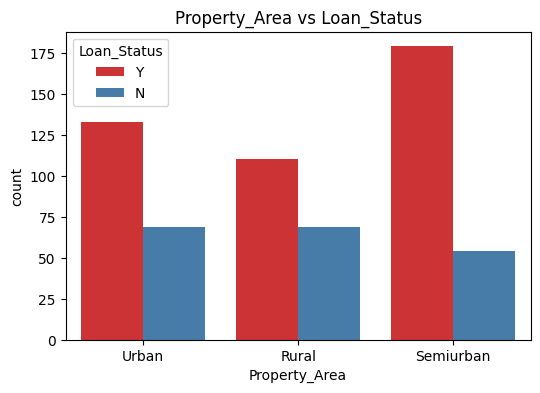

In [13]:
categorical = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Loan_Status', data=df, palette='Set1')
    plt.title(f'{col} vs Loan_Status')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Mengubah Loan Term Menjadi Kategorikal

In [14]:
df['Loan_Amount_Term'].unique()
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('category')

## Data Cleaning

In [15]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [16]:
print("Missing values in training data:")
missing_values_table(df)

Missing values in training data:
Your selected dataframe has 12 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


In [17]:
cat_cols_to_input = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History','Loan_Amount_Term']
num_cols_to_input = ['LoanAmount']

In [18]:
from sklearn.impute import KNNImputer

# Impute categorical columns with SimpleImputer (most frequent)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols_to_input] = categorical_imputer.fit_transform(df[cat_cols_to_input])

# Impute numerical columns with KNNImputer
numerical_imputer = KNNImputer(n_neighbors=5)
df[num_cols_to_input] = numerical_imputer.fit_transform(df[num_cols_to_input])

print("Missing values after imputation:")
print(df[cat_cols_to_input + num_cols_to_input].isnull().sum())

Missing values after imputation:
Gender              0
Married             0
Dependents          0
Self_Employed       0
Credit_History      0
Loan_Amount_Term    0
LoanAmount          0
dtype: int64


In [19]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows in the training data: {duplicate_rows}")

Number of duplicate rows in the training data: 0


## Mengubah Kolom Keuangan menjadi IDR

In [20]:
df['ApplicantIncome'] = df['ApplicantIncome'] * 16000
df['CoapplicantIncome'] = df['CoapplicantIncome'] * 16000
df['LoanAmount'] = df['LoanAmount'] * 1000 * 16000

## Log-Transformation


After Log Transformation:


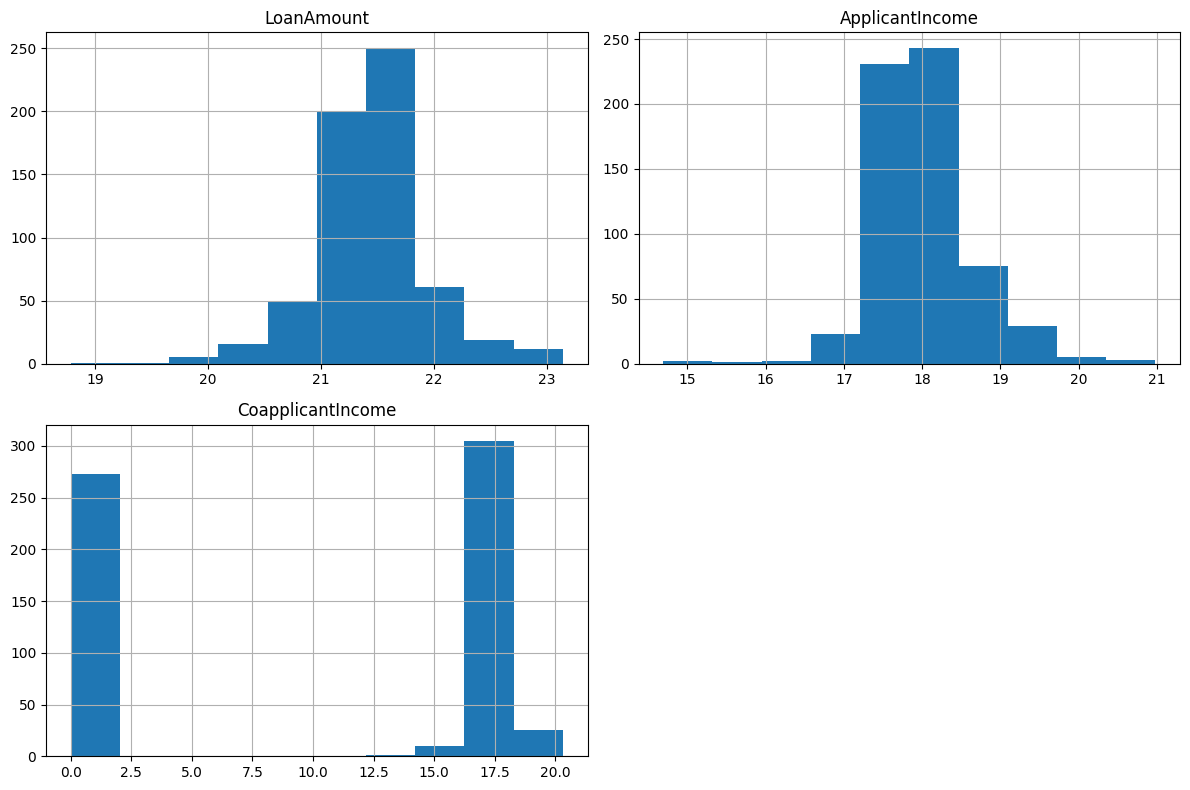

In [21]:
numerical_cols_to_transform = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']

# Apply log transformation, add a small value to handle zeros
for col in numerical_cols_to_transform:
    # Check for zero values before applying log transformation
    if (df[col] == 0).any():
      print(f"Warning: Column '{col}' contains zero values. Adding 1 before log transformation.")
      df[col] = np.log1p(df[col]) # Use log1p to handle zeros gracefully
    else:
      df[col] = np.log(df[col])

print("\nAfter Log Transformation:")
df[numerical_cols_to_transform].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

## Label Encoding

In [22]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in column 'Gender':
['Male' 'Female']
------------------------------
Unique values in column 'Married':
['No' 'Yes']
------------------------------
Unique values in column 'Dependents':
['0' '1' '2' '3+']
------------------------------
Unique values in column 'Education':
['Graduate' 'Not Graduate']
------------------------------
Unique values in column 'Self_Employed':
['No' 'Yes']
------------------------------
Unique values in column 'Loan_Amount_Term':
[360.0 120.0 240.0 180.0 60.0 300.0 480.0 36.0 84.0 12.0]
------------------------------
Unique values in column 'Credit_History':
[1.0 0.0]
------------------------------
Unique values in column 'Property_Area':
['Urban' 'Rural' 'Semiurban']
------------------------------
Unique values in column 'Loan_Status':
['Y' 'N']
------------------------------


In [23]:
# Salin dataframe agar tidak mengubah data asli
df_encoded = df.copy()

# Mapping manual
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 1, 'Female': 0})
df_encoded['Married'] = df_encoded['Married'].map({'Yes': 1, 'No': 0})
df_encoded['Dependents'] = df_encoded['Dependents'].replace('3+', 3).astype(float)
df_encoded['Education'] = df_encoded['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df_encoded['Self_Employed'] = df_encoded['Self_Employed'].map({'Yes': 1, 'No': 0})
df_encoded['Property_Area'] = df_encoded['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
df_encoded['Loan_Status'] = df_encoded['Loan_Status'].map({'Y': 1, 'N': 0})
df_encoded['Credit_History'] = df_encoded['Credit_History'].astype(int)

# Mapping manual Loan_Amount_Term
term_mapping = {
    12.0: 1,
    36.0: 2,
    60.0: 3,
    84.0: 4,
    120.0: 5,
    180.0: 6,
    240.0: 7,
    300.0: 8,
    360.0: 9,
    480.0: 10
}

df_encoded['Loan_Amount_Term_Code'] = df_encoded['Loan_Amount_Term'].map(term_mapping)

# Tampilkan 5 baris pertama setelah mapping
df_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_Code
0,1,0,0.0,1,0,18.354370,0.000000,21.574525,360.0,1,2,1,9
1,1,1,1.0,1,0,18.110453,16.998884,21.440130,360.0,1,0,0,9
2,1,1,0.0,1,1,17.686712,0.000000,20.777754,360.0,1,2,1,9
3,1,1,0.0,0,0,17.537051,17.445913,21.375591,360.0,1,2,1,9
4,1,0,0.0,1,0,18.379859,0.000000,21.536859,360.0,1,2,1,9


## Feature Engineering

In [24]:
# Salin dataframe
df_feat = df_encoded.copy()

# 1. Total Income: Gabungan dari ApplicantIncome dan CoapplicantIncome
df_feat['Total_Income'] = df_feat['ApplicantIncome'] + df_feat['CoapplicantIncome']

# 2. Income per Person: Pendapatan per orang tanggungan
df_feat['Income_Per_Person'] = df_feat['Total_Income'] / (df_feat['Dependents'] + 1)

# 3. Loan to Income Ratio: Rasio jumlah pinjaman terhadap total pendapatan
df_feat['Loan_Income_Ratio'] = df_feat['LoanAmount'] / df_feat['Total_Income']

# 7. Interaction: Education × Self_Employed (apakah Wirausaha Berpendidikan)
df_feat['Educated_SelfEmployed'] = df_feat['Education'] * df_feat['Self_Employed']

# 8. Is_Single: Apakah pemohon belum menikah dan tidak punya tanggungan
df_feat['Is_Single'] = ((df_feat['Married'] == 0) & (df_feat['Dependents'] == 0)).astype(int)

In [27]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 614 non-null    int64  
 1   Married                614 non-null    int64  
 2   Dependents             614 non-null    float64
 3   Education              614 non-null    int64  
 4   Self_Employed          614 non-null    int64  
 5   ApplicantIncome        614 non-null    float64
 6   CoapplicantIncome      614 non-null    float64
 7   LoanAmount             614 non-null    float64
 8   Loan_Amount_Term       614 non-null    object 
 9   Credit_History         614 non-null    int64  
 10  Property_Area          614 non-null    int64  
 11  Loan_Status            614 non-null    int64  
 12  Loan_Amount_Term_Code  614 non-null    int64  
 13  Total_Income           614 non-null    float64
 14  Income_Per_Person      614 non-null    float64
 15  Loan_I